In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique , argmax

# TensorFlow already contain MNIST data set which can be loaded using Keras
import tensorflow as tf # installing tenserflow
from tensorflow import keras

In [2]:
# To Load the MNIST dataset from the Keras API provided by TensorFlow.
mnist = tf.keras.datasets.mnist

# Dividing the data into train and test data.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [6]:
print(x_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [7]:
# Reshaping the input Data which is used as a input in CNN in Tenserflow
# CNN takes the input Data in 4D Format with the shape (num_samples, image_height, image_width, num_channels)
# Here (num_channels) is set to 1 which means input image is Grayscale.

x_train = x_train.reshape((x_train.shape[0] , x_train.shape[1] , x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0] , x_test.shape[1] , x_test.shape[2],1))
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(x_test.dtype)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
uint8
uint8


In [8]:
# Normalizing Pixel Values

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
print(x_train.dtype)
print(x_test.dtype)

float32
float32


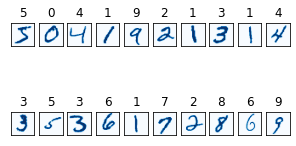

In [9]:
# Visulaizing Subsets of images in MNIST Dataset along with coressponding labels.

fig=plt.figure(figsize=(5,3))
for i in range(20):
    ax =fig.add_subplot(2,10,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='Blues')
    ax.set_title(y_train[i])

In [10]:
# showing shape of single image
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

# BUILDING NEURAL NETWORK THAT CAN READ HANDWRITTEN DIGITS.


In [11]:
# Creating aSequential Model in Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


This summary shows that the model has four layers:

1. A Flatten layer that flattens the input images to a 1D array of length 784.
2. A Dense layer with 128 units and ReLU activation.
3. A Dropout layer that randomly sets 20% of the input units to 0 during training.
4. A second Dense layer with 10 units and no activation function.

The summary also shows the number of trainable parameters in each layer, as well as the total number of trainable parameters in the model. In this case, the model has a total of 101,770 trainable parameters.

In [13]:
# Displaying Neural Network Model
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [14]:
# Making Prediction on Model
prediction = model(x_train[:1]).numpy()
prediction

array([[ 0.82538474, -0.91875607,  0.13710961,  0.73913014, -0.18482083,
        -0.26157752, -0.18447512, -0.3159945 ,  0.340477  , -0.09491526]],
      dtype=float32)

In [15]:
# Applying Softmax() Function to prediction array
# This convert an output vector of real numbers into a probability distribution over predicted classes
tf.nn.softmax(prediction).numpy()

array([[0.20024899, 0.03500254, 0.1006135 , 0.18370055, 0.0729195 ,
        0.06753185, 0.07294471, 0.06395517, 0.12330411, 0.0797791 ]],
      dtype=float32)

In [16]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], prediction).numpy()
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

# Model fitting

In [17]:
# Training the Model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.9151
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1488 - accuracy: 0.9549
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1078 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0894 - accuracy: 0.9721
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0752 - accuracy: 0.9769


In [18]:
# Evaluating the Model
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0728 - accuracy: 0.9764 - 375ms/epoch - 1ms/step


[0.07284942269325256, 0.9764000177383423]

In [19]:
# Creating a new sequential model which includes both previously trained model and softmax layer.
probability_model = tf.keras.Sequential([ model,tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.0362957e-07, 1.0227573e-09, 8.2214729e-06, 7.4222073e-04,
        3.1102017e-11, 1.3090188e-07, 1.5790614e-12, 9.9924880e-01,
        2.0425038e-07, 1.5340980e-07],
       [6.1558048e-10, 2.3966846e-03, 9.9757165e-01, 9.4462812e-06,
        6.3936893e-14, 1.4602750e-07, 3.1750560e-08, 2.3560323e-13,
        2.2104829e-05, 9.5854226e-14],
       [5.6433869e-08, 9.9779439e-01, 3.0163093e-04, 4.0599989e-06,
        2.7907570e-05, 1.3538551e-06, 7.1096024e-06, 1.4894076e-03,
        3.7365689e-04, 4.2191726e-07],
       [9.9998105e-01, 2.0443105e-09, 4.3943055e-06, 8.4032308e-08,
        8.4200124e-08, 5.1708412e-07, 4.8775610e-06, 9.3078688e-07,
        3.1583642e-09, 7.9867477e-06],
       [1.0654175e-06, 4.8966654e-11, 1.7595640e-06, 3.3845300e-08,
        9.9671328e-01, 6.8516250e-08, 1.0057196e-05, 9.9409162e-06,
        8.3478238e-07, 3.2629068e-03]], dtype=float32)>

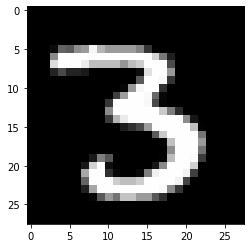

In [20]:
# Displaying a Grayscale Image
img = x_train[12]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [21]:
# Predicting the Result
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 57ms/step
predicted : 3
